# epymorph dev log: June 28th, 2023

_author: Tyler Coles_

_as of git commit: 034c9b3c7c3c74db9892f49199b3f3511f137e1b_

## Question

Does the new Pei IPM implementation produce similar output to the old Pei IPM implementation?

If yes, we can feel confident replacing older IPM implementations.

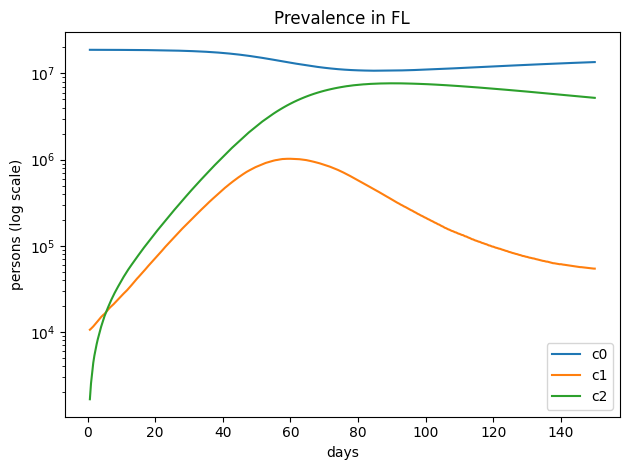

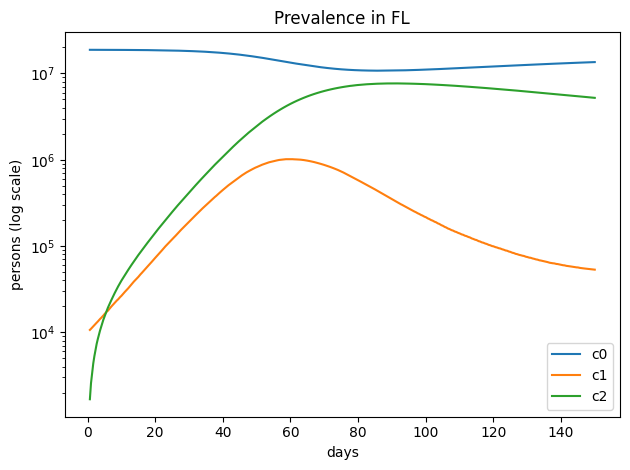

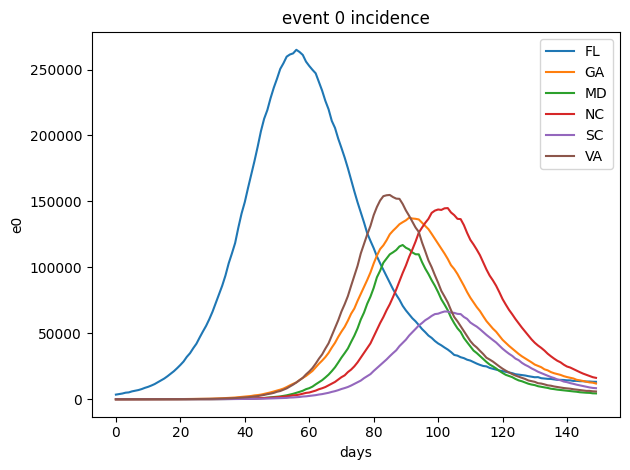

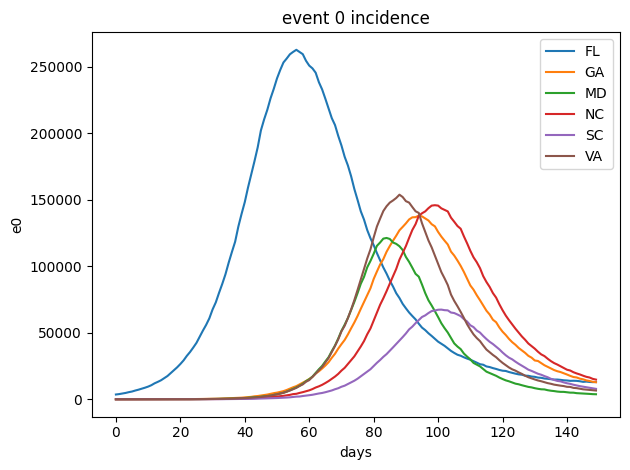

In [4]:
from datetime import date

from epymorph.data import geo_library, ipm_library, mm_library
from epymorph.run import plot_event, plot_pop
from epymorph.simulation import Simulation

# Run simulation

sim1 = Simulation(geo_library["pei"](), ipm_library["pei"](), mm_library["pei"]())

out1 = sim1.run(
    param={
        "theta": 0.1,
        "move_control": 0.9,
        "infection_duration": 4.0,
        "immunity_duration": 90.0,
        "infection_seed_loc": 0,
        "infection_seed_size": 10_000,
    },
    start_date=date(2015, 1, 1),
    duration_days=150,
)

sim2 = Simulation(geo_library["pei"](), ipm_library["pei2"](), mm_library["pei"]())

out2 = sim2.run(
    param={
        "theta": 0.1,
        "move_control": 0.9,
        "infection_duration": 4.0,
        "immunity_duration": 90.0,
        "infection_seed_loc": 0,
        "infection_seed_size": 10_000,
    },
    start_date=date(2015, 1, 1),
    duration_days=150,
)

plot_pop(out1, 0)
plot_pop(out2, 0)

plot_event(out1, 0)
plot_event(out2, 0)

## Conclusion

Running this simulation several times, these output graphs look very similar. We could probably do a more formal analysis to prove that, but I think this is sufficient to justify rolling out the new CompartmentIpm implementation.